In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import exifread
import glob, os
import shutil
from sklearn import decomposition
import sklearn 
import time
from scipy import stats

In [2]:
def sliceim(im):
    xdim, ydim=np.shape(im)
    im=im-np.median(im)
    numslice=8
    dx=xdim/numslice
    dy=ydim/numslice
    var=[]
    for i in range(numslice-1):
        for j in range(numslice-1):
            imslice=im[dx*i:dx*(i+1),dy*j:dy*(j+1)]
            var=np.append(var,np.std(imslice))
    p16=np.percentile(var,16)
    med=np.median(var)
    if np.max(var) > med+5*(med-p16):
        return True

In [2]:
files = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Negatives/*.JPG")
numneg=len(files)
print numneg
files = files+glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/*.JPG")
num=len(files)
print num
filepos = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/*.JPG")
numpos=len(filepos)
print files[-1*numpos:-1][0]
direc='/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/PCA/'
lenad=len('/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/')


7224
7316
/Users/Mehdi/Downloads/GoldenGate-Animals/SM-1_SB-1_20141226/Positives/SM-1_20141205 (6801).JPG


In [3]:
dates=np.array([])
lat=np.array([])
lon=np.array([])
flash=np.array([])
lightsource=np.array([])
colorspace=np.array([])
# Open image file for reading (binary mode)
for i in range(num): 
    f = open(files[i], 'rb')
    tags = exifread.process_file(f)
    dates=np.append(dates,str(tags['EXIF DateTimeOriginal']).split()[0])
    lat= np.append(lat,str(tags['GPS GPSLatitude']))
    lon= np.append(lon,str(tags['GPS GPSLongitude']))
    flash=np.append(flash,str(tags['EXIF Flash']))
    lightsource=np.append(lightsource,str(tags['EXIF LightSource']))
    colorspace=np.append(colorspace,str(tags['EXIF ColorSpace']))
    
datepos=np.array([])
latpos=np.array([])
lonpos=np.array([])
flashpos=np.array([])
lightsourcepos=np.array([])
colorspacepos=np.array([])
# Open image file for reading (binary mode)
for i in range(numpos): 
    f = open(filepos[i], 'rb')
    tagpos = exifread.process_file(f)
    datepos=np.append(datepos,str(tagpos['EXIF DateTimeOriginal']).split()[0])
    latpos= np.append(latpos,str(tagpos['GPS GPSLatitude']))
    lonpos= np.append(lonpos,str(tagpos['GPS GPSLongitude']))
    flashpos=np.append(flashpos,str(tagpos['EXIF Flash']))
    lightsourcepos=np.append(lightsourcepos,str(tagpos['EXIF LightSource']))
    colorspacepos=np.append(colorspacepos,str(tagpos['EXIF ColorSpace']))

In [4]:
uni_lightsource =np.unique(lightsource)
uni_colorspace =np.unique(colorspace)
uni_flash =np.unique(flash)
uni_lon =np.unique(lon)
uni_lat =np.unique(lat)

uni_lightsourcepos =np.unique(lightsourcepos)
uni_colorspacepos =np.unique(colorspacepos)
uni_flashpos =np.unique(flashpos)
uni_lonpos =np.unique(lonpos)
uni_latpos =np.unique(latpos)
uni_latpos

array(['[37, 31, 35]'], 
      dtype='|S32')

In [5]:
uniquedate =np.unique(dates)
print uniquedate
num_unique=np.zeros(len(uniquedate))
for i in range(len(uniquedate)):
    num_unique[i]=len(np.where(dates== uniquedate[i])[0])
num_unique

uniquedatepos =np.unique(datepos)
num_uniquepos=np.zeros(len(uniquedatepos))
for i in range(len(uniquedatepos)):
    num_uniquepos[i]=len(np.where(datepos== uniquedatepos[i])[0])
num_uniquepos

['2014:11:12' '2014:11:14' '2014:11:15' '2014:11:16' '2014:11:17'
 '2014:11:18' '2014:11:20' '2014:11:21' '2014:11:22' '2014:11:23'
 '2014:11:24' '2014:11:25' '2014:11:26' '2014:11:27' '2014:11:28'
 '2014:11:30' '2014:12:01' '2014:12:05' '2014:12:06' '2014:12:11'
 '2014:12:13' '2014:12:14' '2014:12:15' '2014:12:16' '2014:12:26']


array([  1.,   3.,   6.,   3.,   9.,  14.,   3.,  24.,  12.,   1.,   3.,
         6.,   7.])

Iteration over unique date of  2014:11:24
2014:11:24
Reading images, Down sampling and converting to Grayscale 
Bluring images...
Finding the 10 most important principle axis and each image components
saving the PCA residual maps
--- 278.639787912 seconds ---


/Users/Mehdi/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


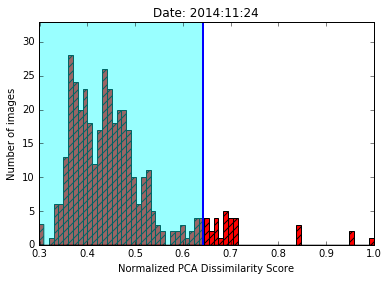

In [6]:
#listname=['SM-1_SB-13_20160315','SM-4_SB-1_20160523','SM-4_SB-13_20161216','SM-5_SB-5_20140319','SM-5_SB-8_20150406']
listname=['SM-1_SB-1_20141226']
start_time = time.time()

for memory in listname:
    files = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/"+memory+"/Negatives/*.JPG")

    numneg=len(files)
    print numneg
    files = files+glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/"+memory+"/Positives/*.JPG")
    num=len(files)
    print num
    filepos = glob.glob("/Users/Mehdi/Downloads/GoldenGate-Animals/"+memory+"/Positives/*.JPG")
    numpos=len(filepos)
    print files[-1*numpos:-1][0]
    direc='/Users/Mehdi/Downloads/GoldenGate-Animals/'+memory+'/PCA/'
    lenad=len('/Users/Mehdi/Downloads/GoldenGate-Animals/'+memory+'/')


    dates=np.array([])
    lat=np.array([])
    lon=np.array([])
    flash=np.array([])
    lightsource=np.array([])
    colorspace=np.array([])
    # Open image file for reading (binary mode)
    for i in range(num): 
        f = open(files[i], 'rb')
        tags = exifread.process_file(f)
        dates=np.append(dates,str(tags['EXIF DateTimeOriginal']).split()[0])
        lat= np.append(lat,str(tags['GPS GPSLatitude']))
        lon= np.append(lon,str(tags['GPS GPSLongitude']))
        flash=np.append(flash,str(tags['EXIF Flash']))
        lightsource=np.append(lightsource,str(tags['EXIF LightSource']))
        colorspace=np.append(colorspace,str(tags['EXIF ColorSpace']))

    datepos=np.array([])
    latpos=np.array([])
    lonpos=np.array([])
    flashpos=np.array([])
    lightsourcepos=np.array([])
    colorspacepos=np.array([])
    # Open image file for reading (binary mode)
    for i in range(numpos): 
        f = open(filepos[i], 'rb')
        tagpos = exifread.process_file(f)
        datepos=np.append(datepos,str(tagpos['EXIF DateTimeOriginal']).split()[0])
        latpos= np.append(latpos,str(tagpos['GPS GPSLatitude']))
        lonpos= np.append(lonpos,str(tagpos['GPS GPSLongitude']))
        flashpos=np.append(flashpos,str(tagpos['EXIF Flash']))
        lightsourcepos=np.append(lightsourcepos,str(tagpos['EXIF LightSource']))
        colorspacepos=np.append(colorspacepos,str(tagpos['EXIF ColorSpace']))


    uni_lightsource =np.unique(lightsource)
    uni_colorspace =np.unique(colorspace)
    uni_flash =np.unique(flash)
    uni_lon =np.unique(lon)
    uni_lat =np.unique(lat)

    uni_lightsourcepos =np.unique(lightsourcepos)
    uni_colorspacepos =np.unique(colorspacepos)
    uni_flashpos =np.unique(flashpos)
    uni_lonpos =np.unique(lonpos)
    uni_latpos =np.unique(latpos)
    uni_latpos

    uniquedate =np.unique(dates)
    #print uniquedate
    num_unique=np.zeros(len(uniquedate))
    for i in range(len(uniquedate)):
        num_unique[i]=len(np.where(dates== uniquedate[i])[0])
    num_unique

    uniquedatepos =np.unique(datepos)
    num_uniquepos=np.zeros(len(uniquedatepos))
    for i in range(len(uniquedatepos)):
        num_uniquepos[i]=len(np.where(datepos== uniquedatepos[i])[0])
    num_uniquepos


    #start_time = time.time()
    
    nightname_all=direc[0:-4]+'Night.txt'
    allnight=open(nightname_all,'w')
    allcandid=direc[0:-4]+'allcandid.txt'
    allday=open(allcandid,'w')
    for index in range(len(uniquedate)): 
    #for index in np.linspace(6,len(uniquedate)-1,len(uniquedate)-6):
        print 'Iteration over unique date of ',uniquedate[index] 
        id0=np.where((dates== uniquedate[index]) & (lightsource=='Daylight'))
        print dates[id0][0]
        name=direc+dates[id0][0]
        if os.path.isdir(name):
            shutil.rmtree(name)
        if os.path.isdir(direc)== False:
            os.mkdir(direc)    
        os.mkdir(name)
        sx=1840
        sy=2592
        dx=sx/5
        dy=sy/5
        imcube=np.zeros([368, 518])
        # To distinguish between photos taken during the day and night time.
        daynight=np.zeros(len(id0[0]))


        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        print 'Reading images, Down sampling and converting to Grayscale '
        for i in range(len(id0[0])):
            im=cv2.imread(files[id0[0][i]])
            if (np.max(im[500:520,500:520,0]-im[500:520,500:520,1]!=0)):
                daynight[i]=1
                im[1744:1944,0:209,:]=0
                im=im[0:1840,:,:]
                #im[1840:1944,:,:]=0
                img=cv2.resize(im, (dy, dx),interpolation=cv2.INTER_NEAREST)
                imresized=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                #imresized = clahe.apply(imresized)
                imcube=np.dstack((imcube,imresized))

        # Saving the list of night time images
        indnight=np.where(daynight == 0)[0]
        imlistblur_n= np.array(files)[id0[0]][indnight]
        nightname=name+'/'+'Night-'+name[-10:]+'.txt'
        night=open(nightname,'w')
        for i in imlistblur_n:
            night.write(i+'\n')
            allnight.write(i+'\n')
        night.close()

        if (len(np.shape(imcube))>2) | (np.max(imcube)>0):
            imcube=np.delete(imcube,0,2)
            numdayphoto=len(imcube[0,0,:])
            print 'Bluring images...'
            imblur=np.empty([368,518])
            for i in range(numdayphoto):
                imblur=np.dstack((imblur,cv2.blur(imcube[:,:,i],(5,5))))
            imblur=np.delete(imblur,0,2)

            #Calculating the mean blur image
            nx,ny,nz=np.shape(imblur)
            blurmean=np.mean(imblur,axis=2)
            imblur_center=np.zeros([nx*ny,nz])
            np.shape(imblur)
            for i in range(numdayphoto):
                imblur_center[:,i]=(imblur[:,:,i]-blurmean).flatten()
            print 'Finding the 10 most important principle axis and each image components'
            n_components=10
            estimator=decomposition.PCA(n_components=n_components, svd_solver='randomized',whiten=True)
            estimator.fit(imblur_center.T)

            blur_transformed=estimator.fit_transform(imblur_center.T)
            blur_inverse=estimator.inverse_transform(blur_transformed)

            ### calculating the similarity between the PCA blured inverse transformed image and the original image.
            stdpcablur=[]
            medianpcablur=[]
            sliceimout=np.zeros(numdayphoto,dtype=bool)
            for i in range(numdayphoto):
                invblur=blur_inverse[i,:].reshape(368, 518)
                imres=imblur_center[:,i].reshape(368, 518)-invblur
                stdpcablur=np.append(stdpcablur,np.std(imres))
                medianpcablur=np.append(medianpcablur,np.mean(imres))
                sliceimout[i]=sliceim(imres)
            # Plotting the distribution of stddev of the residual maps
            plt.figure()
            minstdblur=np.min(stdpcablur)
            maxstdblur=np.max(stdpcablur)

            n, bins, patches=plt.hist(stdpcablur/maxstdblur,bins=np.linspace(minstdblur/maxstdblur,1,70),facecolor='red', hatch='///',alpha=1.0,label=' Lon:'+lon[id0][0][1:-1]+'\n Lat:'+lat[id0][0][1:-1]+'\n Daylight')
            minmedianblur=np.min(medianpcablur)
            medianmaxblur=np.max(medianpcablur)

            stdpcablur_med=np.median(stdpcablur/maxstdblur)
            stdpcablur_16=np.percentile(stdpcablur/maxstdblur,16)
            sigma=stdpcablur_med-stdpcablur_16
            newthr=stdpcablur_med+2*sigma
            xmin=np.min(stdpcablur/maxstdblur)


            plt.axis([xmin, np.max([1,newthr+0.02]), 0, np.max(n)+5])
            #plt.grid(True)
            plt.xlabel('Normalized PCA Dissimilarity Score')
            plt.ylabel('Number of images')
            plt.title('Date: '+dates[id0][0])
            plt.plot([newthr,newthr],[0,np.max(n)+5],linewidth=2,color='blue',label=r'3\sigma')

            right=np.ones(np.max(n)+5)-0.5
            plt.hist(right,bins=np.linspace(newthr,np.max([1,newthr+0.02]),2),facecolor='green', alpha=0.4)
            left=np.ones(np.max(n)+5)-0.8
            plt.hist(left,bins=np.linspace(0,newthr,2),facecolor='cyan', alpha=0.4)
            plotname=name+'/'+'PCA-Dissimilarity-'+name[-10:]+'.png'
            plt.savefig(plotname)

            # Saving the list of outlier candidates
            indday=np.where(daynight == 1)[0]
            imlistblur= np.array(files)[id0[0]][indday]

            #out2sigma=np.where(stdpcablur/maxstdblur >= newthr)[0]
            out2sigma=np.where(sliceimout == True)[0]
            # Fill in the blanks between the out2sigma IDs that might have been missed
            if (len(out2sigma) > 0):
                if  out2sigma[0] > 0:
                    np.insert(out2sigma,0,out2sigma[0]-1)
                if  out2sigma[-1] < len(imlistblur)-1:
                    out2sigma=np.append(out2sigma,out2sigma[-1]+1)
                arr2=out2sigma[1:]-out2sigma[0:-1]
                id=np.where(arr2 != 1)[0]
                if len(id) > 0:
                    out2sigma=np.insert(out2sigma,id+1,out2sigma[id]+1)

                newname=name+'/'+'Outliers-'+name[-10:]+'.txt'
                cand=open(newname,'w')
                for i in imlistblur[out2sigma]:
                    cand.write(i+'\n')
                    allday.write(i+'\n')

                cand.close()

                # Saving the std of residuals in a textfile
                resdata=name+'/'+'STD-Res-'+name[-10:]+'.txt'
                res=open(resdata,'w')
                for i in range(len(imlistblur)):
                    res.write(imlistblur[i]+'    '+str(stdpcablur[i])+'\n')
                res.close()

                # Saving the PCA residual maps
                print 'saving the PCA residual maps' 
                for i in range(len(out2sigma)):
                    newname=name+'/'+imlistblur[out2sigma[i]][lenad:lenad+1]+'_'+imlistblur[out2sigma[i]][lenad+10:-4]
                    invblur=blur_inverse[out2sigma,:][i].reshape(368, 518)
                    #cv2.imwrite(newname+'_PCA_InvTransformed.JPG',invblur+blurmean)
                    #cv2.imwrite(newname+'_PCA_MeanSubOrg.JPG',imblur_center[:,i].reshape(368, 518)+blurmean)
                    imres=imblur_center[:,out2sigma[i]].reshape(368, 518)-invblur
                    imres=imres+np.fabs(np.min(imres))
                    imres=255*imres/np.max(imres)
                    cv2.imwrite(newname+'_PCA_Residual.JPG',imres)

            if (len(out2sigma) <=5) & (len(indday) <= 50):
                print 'Low sample size! Outputing all the original images...'
                allname=name+'/'+'all-'+name[-10:]+'.txt'
                allim=open(allname,'w')
                for i in range(len(indday)):
                    orgname=name+'/'+imlistblur[i][lenad:lenad+1]+'_'+imlistblur[i][lenad+10:-4]
                    cv2.imwrite(orgname+'.JPG',imcube[:,:,i])
                    allim.write(imlistblur[i]+'\n')
                    allday.write(imlistblur[i]+'\n')
                allim.close()
    allnight.close()
    allday.close()

print("--- %s seconds ---" % (time.time() - start_time))



In [20]:
med=np.median(stdpcablur/maxstdblur)
print med+2*sigma
print newthr
print np.percentile(stdpcablur/maxstdblur,95)

0.57528673297
0.642967677628
0.674867500218


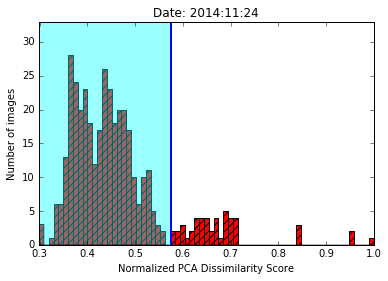

In [21]:
# Plotting the distribution of stddev of the residual maps
plt.figure()
minstdblur=np.min(stdpcablur)
maxstdblur=np.max(stdpcablur)

n, bins, patches=plt.hist(stdpcablur/maxstdblur,bins=np.linspace(minstdblur/maxstdblur,1,70),facecolor='red', hatch='///',alpha=1.0,label=' Lon:'+lon[id0][0][1:-1]+'\n Lat:'+lat[id0][0][1:-1]+'\n Daylight')
minmedianblur=np.min(medianpcablur)
medianmaxblur=np.max(medianpcablur)

stdpcablur_med=np.median(stdpcablur/maxstdblur)
stdpcablur_16=np.percentile(stdpcablur/maxstdblur,16)
sigma=stdpcablur_med-stdpcablur_16
newthr=stdpcablur_med+2*sigma
xmin=np.min(stdpcablur/maxstdblur)


plt.axis([xmin, np.max([1,newthr+0.02]), 0, np.max(n)+5])
#plt.grid(True)
plt.xlabel('Normalized PCA Dissimilarity Score')
plt.ylabel('Number of images')
plt.title('Date: '+dates[id0][0])
plt.plot([newthr,newthr],[0,np.max(n)+5],linewidth=2,color='blue',label=r'3\sigma')

right=np.ones(np.max(n)+5)-0.5
plt.hist(right,bins=np.linspace(newthr,np.max([1,newthr+0.02]),2),facecolor='green', alpha=0.4)
left=np.ones(np.max(n)+5)-0.8
plt.hist(left,bins=np.linspace(0,newthr,2),facecolor='cyan', alpha=0.4)
plotname=name+'/'+'PCA-Dissimilarity-'+name[-10:]+'.png'

In [11]:
a=np.arange(10)
b=a[-5:]
c=np.append(a,b)
c

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9])